In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy.stats import linregress 


In [5]:
def eplus_fileimport(archivo):
    tmp = pd.read_csv(archivo,names=nombres,skiprows=1)
    tmp.tiempo = tmp.tiempo.str.replace('24:00:00','23:59:59')
    tmp.tiempo = '2019 '+ tmp.tiempo
    tmp.tiempo = pd.to_datetime(tmp.tiempo,format='%Y %m/%d %H:%M:%S')
    tmp.set_index('tiempo',inplace=True)
    return tmp

In [199]:
archivo = "../idfs/020_definitivo/020.csv"

nombres= np.genfromtxt(archivo,max_rows=1,dtype="U",delimiter=',')

for i,nombre in enumerate(nombres):
    print(i,nombre)
    
nombres[0]= 'tiempo'
nombres[1]= 'To'
nombres[4]= 'Ti'
nombres[9]= 'PMV'
nombres[10]= 'PPD'

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 TZCUB5:Zone Mean Air Temperature [C](TimeStep)
3 TZCUB6:Zone Mean Air Temperature [C](TimeStep)
4 TZCUB7:Zone Mean Air Temperature [C](TimeStep)
5 TZLABORATORIOS:Zone Mean Air Temperature [C](TimeStep)
6 TZTECHOCUB5:Zone Mean Air Temperature [C](TimeStep)
7 TZTECHOCUB6:Zone Mean Air Temperature [C](TimeStep)
8 TZTECHOCUB7:Zone Mean Air Temperature [C](TimeStep)
9 TZCUB7 PERSONAS:Zone Thermal Comfort Fanger Model PMV [](TimeStep)
10 TZCUB7 PERSONAS:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)
11 TZCUB6 PERSONAS:Zone Thermal Comfort Fanger Model PMV [](TimeStep)
12 TZCUB6 PERSONAS:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)
13 TZCUB5 PERSONAS:Zone Thermal Comfort Fanger Model PMV [](TimeStep)
14 TZCUB5 PERSONAS:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)


In [183]:
archivo2 = "../idfs/021_color/021.csv"

nombres= np.genfromtxt(archivo,max_rows=1,dtype="U",delimiter=',')

for i,nombre in enumerate(nombres):
    print(i,nombre)
    
nombres[0]= 'tiempo'

nombres[4]= 'Ti2'
nombres[9]= 'PMV2'
nombres[10]= 'PPD2'

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 TZCUB5:Zone Mean Air Temperature [C](TimeStep)
3 TZCUB6:Zone Mean Air Temperature [C](TimeStep)
4 TZCUB7:Zone Mean Air Temperature [C](TimeStep)
5 TZLABORATORIOS:Zone Mean Air Temperature [C](TimeStep)
6 TZTECHOCUB5:Zone Mean Air Temperature [C](TimeStep)
7 TZTECHOCUB6:Zone Mean Air Temperature [C](TimeStep)
8 TZTECHOCUB7:Zone Mean Air Temperature [C](TimeStep)
9 TZCUB7 PERSONAS:Zone Thermal Comfort Fanger Model PMV [](TimeStep)
10 TZCUB7 PERSONAS:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)
11 TZCUB6 PERSONAS:Zone Thermal Comfort Fanger Model PMV [](TimeStep)
12 TZCUB6 PERSONAS:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)
13 TZCUB5 PERSONAS:Zone Thermal Comfort Fanger Model PMV [](TimeStep)
14 TZCUB5 PERSONAS:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)


In [155]:
data2=eplus_fileimport(archivo2)

In [175]:
data1=eplus_fileimport(archivo)

In [191]:
data21=eplus_fileimport(archivo2)

In [200]:
data=eplus_fileimport(archivo)

In [176]:
data1['t0']=0

In [171]:
data1

,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),TZCUB5:Zone Mean Air Temperature [C](TimeStep),TZCUB6:Zone Mean Air Temperature [C](TimeStep),Ti2,TZLABORATORIOS:Zone Mean Air Temperature [C](TimeStep),TZTECHOCUB5:Zone Mean Air Temperature [C](TimeStep),TZTECHOCUB6:Zone Mean Air Temperature [C](TimeStep),TZTECHOCUB7:Zone Mean Air Temperature [C](TimeStep),PMV2,PPD2,TZCUB6 PERSONAS:Zone Thermal Comfort Fanger Model PMV [](TimeStep),TZCUB6 PERSONAS:Zone Thermal Comfort Fanger Model PPD [%](TimeStep),TZCUB5 PERSONAS:Zone Thermal Comfort Fanger Model PMV [](TimeStep),TZCUB5 PERSONAS:Zone Thermal Comfort Fanger Model PPD [%](TimeStep),t0
tiempo,,,,,,,,,,,,,,,
2019-05-03 00:10:00,23.0,26.768099,26.426728,26.181563,28.093283,26.883505,26.929993,25.993602,-2.546120,94.347110,-1.724966,63.083766,-1.500635,50.934646,0
2019-05-03 00:20:00,23.0,26.699265,26.368469,26.150753,28.020810,26.837630,26.895516,25.608250,-2.570345,94.789053,-1.756560,64.754830,-1.540692,53.114295,0
2019-05-03 00:30:00,23.0,26.570892,26.264123,26.154266,27.892084,26.761725,26.829628,25.302788,-2.574556,94.863218,-1.806103,67.335033,-1.604272,56.577779,0
2019-05-03 00:40:00,22.8,26.477172,26.191456,26.053766,27.786813,26.693223,26.772312,25.522460,-2.617793,95.580502,-1.843347,69.236367,-1.656132,59.391089,0
2019-05-03 00:50:00,22.7,26.464492,26.186117,25.961959,27.732469,26.631972,26.724948,25.096135,-2.661843,96.231568,-1.853666,69.756573,-1.673662,60.337065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-25 23:20:00,0.0,13.868936,15.707250,12.326381,6.386935,6.730341,8.703313,3.769838,-10.806462,100.000000,-8.377715,100.000000,-9.523237,100.000000,0
2019-06-25 23:30:00,0.0,13.825547,15.665705,12.294309,6.334286,6.662733,8.644696,3.743937,-10.825504,100.000000,-8.403631,100.000000,-9.549626,100.000000,0
2019-06-25 23:40:00,0.0,13.782623,15.624589,12.262633,6.282323,6.595733,8.586639,3.718252,-10.844306,100.000000,-8.429281,100.000000,-9.575726,100.000000,0


In [88]:
data.index[1674]

Timestamp('2019-05-14 15:10:00')

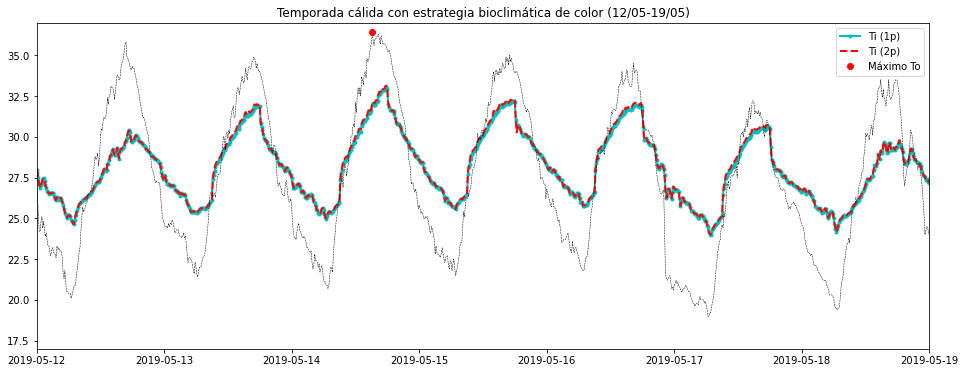

In [201]:
fig, ax = plt.subplots(figsize=(16,6))

fecha1 = parse('2019-05-12')
fecha2 = fecha1 + pd.Timedelta('7D')
ax.set_xlim(fecha1,fecha2)

ax.plot(data1.Ti,'c.-',linewidth=2,label='Ti (1p)')
ax.plot(data.Ti,'r--',linewidth=2,label='Ti (2p)')
#ax.plot(data2.Ti2,'g.-',linewidth=2,label='Ti_color (2p)')
#ax.plot(data21.Ti2,'b--',linewidth=2,label='Ti_color (1p)')
ax.plot(data.To,'k--',linewidth=0.5)
ax.plot(data.index[1674],data.To.max(),'ro',linewidth=10,label='Máximo To')

plt.ylim(17,37)

fin1 = data[fecha1:fecha2]
plt.title('Temporada cálida con estrategia bioclimática de color (12/05-19/05)')
ax.legend()

plt.savefig('modelo.png')

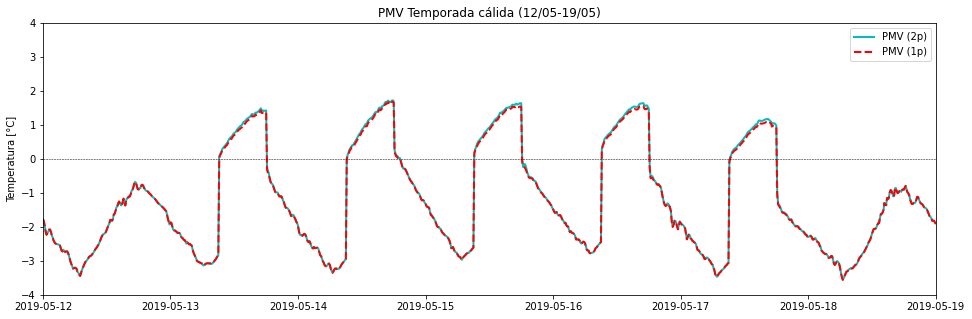

In [203]:
fig, ax = plt.subplots(figsize=(16,5))

fecha1 = parse('2019-05-12')
fecha2 = fecha1 + pd.Timedelta('7D')
ax.set_xlim(fecha1,fecha2)

ax.plot(data.PMV,'c-',linewidth=2,label='PMV (2p)')
#ax.plot(data2.PMV2,'g-',linewidth=2,label='PMV con color (0.32) (2p)')
ax.plot(data1.PMV,'r--',linewidth=2,label='PMV (1p)')
#ax.plot(data21.PMV2,'c--',linewidth=2,label='PMV con color (0.32) (1p)')
ax.plot(data1.t0,'k--',linewidth=0.5)
#ax.plot(data.index[1674],data.To.max(),'ro',linewidth=10,label='Máximo To')

plt.ylabel('Temperatura [°C]')
plt.ylim(-4,4)

fin1 = data[fecha1:fecha2]
plt.title('PMV Temporada cálida (12/05-19/05)')
ax.legend()

plt.savefig('pmv.png')

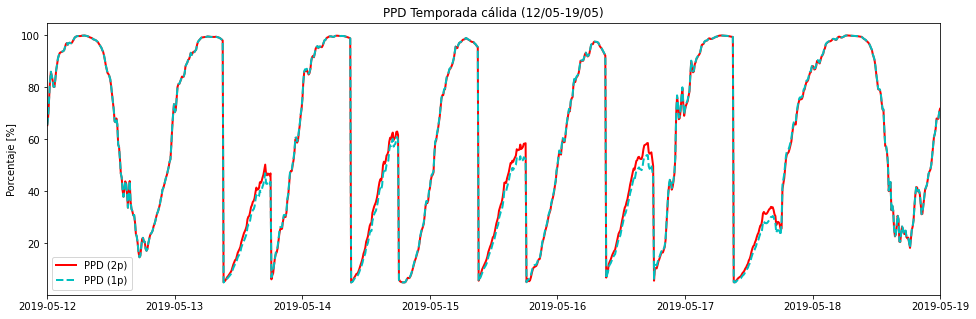

In [205]:
fig, ax = plt.subplots(figsize=(16,5))

fecha1 = parse('2019-05-12')
fecha2 = fecha1 + pd.Timedelta('7D')
ax.set_xlim(fecha1,fecha2)

ax.plot(data.PPD,'r-',linewidth=2,label='PPD (2p)')
#ax.plot(data2.PPD2,'b-',linewidth=2,label='PPD con color (0.32) (2p)')
ax.plot(data1.PPD,'c--',linewidth=2,label='PPD (1p)')
#ax.plot(data21.PPD2,'r--',linewidth=2,label='PPD con color (0.32) (1p)')
#ax.plot(data.t0,'k--',linewidth=0.5)
#ax.plot(data.index[1674],data.To.max(),'ro',linewidth=10,label='Máximo To')
plt.ylabel('Porcentaje [%]')
#plt.ylim(-4,4)

fin1 = data[fecha1:fecha2]
plt.title('PPD Temporada cálida (12/05-19/05)')
ax.legend()

plt.savefig('ppd.png')

In [194]:
data21.PPD2

tiempo
2019-05-03 00:10:00     96.939449
2019-05-03 00:20:00     97.235606
2019-05-03 00:30:00     97.318004
2019-05-03 00:40:00     97.745983
2019-05-03 00:50:00     98.082275
                          ...    
2019-06-25 23:20:00    100.000000
2019-06-25 23:30:00    100.000000
2019-06-25 23:40:00    100.000000
2019-06-25 23:50:00    100.000000
2019-06-25 23:59:59    100.000000
Name: PPD2, Length: 7776, dtype: float64